## Data Preparation: Recordings from Hoofers

The following audio samples will be used as training data. They were collected from tap dancing volunteers. 

In [1]:
from scipy.io import wavfile as wav
from scipy.io.wavfile import read, write
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import librosa.display
from pydub import AudioSegment, effects
from pydub.silence import split_on_silence, detect_nonsilent, detect_silence

In [2]:
def export_wav(m4a_file, new_name):
    audio = AudioSegment.from_file(m4a_file, format='m4a')
    audio.export(new_name, format='wav')
    return "Exported file as " + str(new_name)

def build_list(step, folder, length):
    i = 1
    step_list = []
    while i <= length :
        name = step + "/" + str(folder) + "/" +str(i) + ".wav"
        step_list.append(name)
        i += 1
    return step_list

def build_list_underscore(step, folder, length):
    i = 1
    step_list = []
    while i <= length :
        name = step + "/" + str(folder) +str(i) + ".wav"
        step_list.append(name)
        i += 1
    return step_list

def split_silence_chunks(wavfile, silence_length, threshold, file_names_list):
    sound_file = AudioSegment.from_wav(wavfile)
    audio_chunks = split_on_silence(sound_file, 
                        min_silence_len=silence_length,
                        silence_thresh=threshold)
    for i in range (len(audio_chunks)) :
        chunk = audio_chunks[i]
        chunk.export(file_names_list[i], format='wav')
    print("Exported " + str(len(audio_chunks)) + " files")

def match_target_amplitude(sound, target_dBFS):
    change_in_dBFS = target_dBFS - sound.dBFS
    return sound.apply_gain(change_in_dBFS)

## Step 1:
Export all recordings as wav files

In [12]:
export_wav('../../Source/Train_clips/Shuffle/Shuffle_1.m4a', '../../Source/Train_clips/Shuffle/Shuffle_1.wav')

'Exported file as ../../Source/Train_clips/Shuffle/Shuffle_1.wav'

In [13]:
export_wav('../../Source/Train_clips/Shuffle/Shuffle_2.m4a', '../../Source/Train_clips/Shuffle/Shuffle_2.wav')

'Exported file as ../../Source/Train_clips/Shuffle/Shuffle_2.wav'

In [14]:
export_wav('../../Source/Train_clips/Shuffle/Shuffle_3.m4a', '../../Source/Train_clips/Shuffle/Shuffle_3.wav')

'Exported file as ../../Source/Train_clips/Shuffle/Shuffle_3.wav'

In [15]:
export_wav('../../Source/Train_clips/Shuffle/Shuffle_4.m4a', '../../Source/Train_clips/Shuffle/Shuffle_4.wav')

'Exported file as ../../Source/Train_clips/Shuffle/Shuffle_4.wav'

In [16]:
export_wav('../../Source/Train_clips/Shuffle/Shuffle_5.m4a', '../../Source/Train_clips/Shuffle/Shuffle_5.wav')

'Exported file as ../../Source/Train_clips/Shuffle/Shuffle_5.wav'

In [17]:
export_wav('../../Source/Train_clips/Shuffle/Shuffle_6.m4a', '../../Source/Train_clips/Shuffle/Shuffle_6.wav')

'Exported file as ../../Source/Train_clips/Shuffle/Shuffle_6.wav'

In [18]:
export_wav('../../Source/Train_clips/Shuffle/Shuffle_7.m4a', '../../Source/Train_clips/Shuffle/Shuffle_7.wav')

'Exported file as ../../Source/Train_clips/Shuffle/Shuffle_7.wav'

In [19]:
export_wav('../../Source/Train_clips/Shuffle/Shuffle_8.m4a', '../../Source/Train_clips/Shuffle/Shuffle_8.wav')

'Exported file as ../../Source/Train_clips/Shuffle/Shuffle_8.wav'

In [20]:
export_wav('../../Source/Train_clips/Ball_change/Ball_change_1.m4a', 
           '../../Source/Train_clips/Ball_change/Ball_change_1.wav')

'Exported file as ../../Source/Train_clips/Ball_change/Ball_change_1.wav'

In [21]:
export_wav('../../Source/Train_clips/Ball_change/Ball_change_2.m4a', 
           '../../Source/Train_clips/Ball_change/Ball_change_2.wav')

'Exported file as ../../Source/Train_clips/Ball_change/Ball_change_2.wav'

In [22]:
export_wav('../../Source/Train_clips/Ball_change/Ball_change_3.m4a', 
           '../../Source/Train_clips/Ball_change/Ball_change_3.wav')

'Exported file as ../../Source/Train_clips/Ball_change/Ball_change_3.wav'

In [23]:
export_wav('../../Source/Train_clips/Ball_change/Ball_change_4.m4a', 
           '../../Source/Train_clips/Ball_change/Ball_change_4.wav')

'Exported file as ../../Source/Train_clips/Ball_change/Ball_change_4.wav'

In [24]:
export_wav('../../Source/Train_clips/Ball_change/Ball_change_5.m4a', 
           '../../Source/Train_clips/Ball_change/Ball_change_5.wav')

'Exported file as ../../Source/Train_clips/Ball_change/Ball_change_5.wav'

In [25]:
export_wav('../../Source/Train_clips/Ball_change/Ball_change_6.m4a', 
           '../../Source/Train_clips/Ball_change/Ball_change_6.wav')

'Exported file as ../../Source/Train_clips/Ball_change/Ball_change_6.wav'

In [26]:
export_wav('../../Source/Train_clips/Ball_change/Ball_change_7.m4a', 
           '../../Source/Train_clips/Ball_change/Ball_change_7.wav')

'Exported file as ../../Source/Train_clips/Ball_change/Ball_change_7.wav'

##  Step 2: 
- Check dBFS for all files
- Use results in next step

In [88]:
shuffle_list = build_list_underscore('../../Source/Train_clips/Shuffle','Shuffle_' , 8)
ball_change_list = build_list_underscore('../../Source/Train_clips/Ball_change','Ball_change_' , 7)

In [111]:
#shuffle_list

In [94]:
#ball_change_list

In [79]:
for file in shuffle_list:
    audio = AudioSegment.from_wav(file)
    print (audio.dBFS)

-23.745485470427905
-24.629413014424756
-27.708759705756272
-25.563151947845185
-25.359353485653273
-25.02681557307819
-27.779876430558268
-24.05698991396917


In [80]:
for file in ball_change_list:
    audio = AudioSegment.from_wav(file)
    print (audio.dBFS)

-26.479978409896447
-26.36890413873344
-26.297460164097394
-26.270137431161352
-26.980396422328702
-25.059976904585763
-25.438316662553117


So this gives us an idea about where the silence threshold should be set. (Try -28)

## Step 3:
- Cut files into chunks (split on silence) and export
- Audibly check files with pydub
- Sort out clips without 2 sounds
- Visually check files with librosa

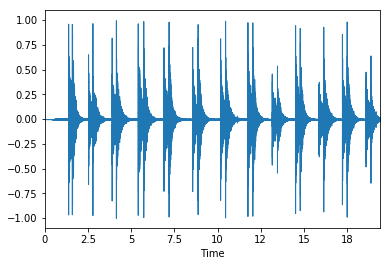

In [126]:
samples, sample_rate = librosa.load('../../Source/Train_clips/Shuffle/Shuffle_1.wav')
librosa.display.waveplot(samples, sr=sample_rate)

In [120]:
for i in range(len(shuffle_list)):
    file = shuffle_list[i]
    sound = AudioSegment.from_wav(file)
    thresh = -28
    length = len(split_on_silence(audio_segment=sound, min_silence_len=350, silence_thresh=thresh))
    split_silence_chunks(wavfile=file,
                     file_names_list= build_list('../../Source/Train_clips/Shuffle', i+1, length),
                     silence_length= 350,
                     threshold= thresh)

Exported 13 files
Exported 92 files
Exported 14 files
Exported 40 files
Exported 32 files
Exported 19 files
Exported 20 files
Exported 48 files


In [125]:
for i in range(len(ball_change_list)):
#for i in range(2):
    file = ball_change_list[i]
    sound = AudioSegment.from_wav(file)
    thresh = -28
    length = len(split_on_silence(audio_segment=sound, min_silence_len=500, silence_thresh=thresh))
    split_silence_chunks(wavfile=file,
                     file_names_list= build_list('../../Source/Train_clips/Ball_change', i+1, length),
                     silence_length= 500,
                     threshold= thresh)

Exported 27 files
Exported 18 files
Exported 54 files
Exported 29 files
Exported 23 files
Exported 34 files
Exported 37 files


While it might seem time consuming to actually listen to all of these clips, it isn't all that crazy considering each root file is no more than 60 seconds long in total. I decided that the time trade-off is worth it to have clean, true data.

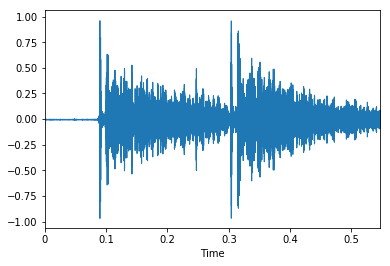

In [127]:
samples, sample_rate = librosa.load('../../Source/Clean_train_clips/Shuffle/1/1.wav')
librosa.display.waveplot(samples, sr=sample_rate)

## Data Augmentation with cleaned clips

In [20]:
class AudioAugmentation:
    
    def read_audio_file(self, file_path):
        input_length = 16000
        data = librosa.core.load(file_path)[0]
        if len(data) > input_length:
            data = data[:input_length]
        else:
            data = np.pad(data, (0, max(0, input_length - len(data))), "constant")
        return data
    
    def add_noise(self, data):
        noise = np.random.randn(len(data))
        data_noise = data + 0.005 * noise
        return data_noise
    
    def shift(self, data):
        return np.roll(data, 1600)
    
    def stretch(self, data, rate=1):
        input_length = 16000
        data = librosa.effects.time_stretch(data, rate)
        if len(data) > input_length:
            data = data[:input_length]
        else:
            data = np.pad(data, (0, max(0, input_length - len(data))), "constant")
        return data
    
    def write_audio_file(self, file, data, sample_rate=16000):
        librosa.output.write_wav(file, data, sample_rate)
        
    def plot_time_series(self, data):
        fig = plt.figure(figsize=(12, 8))
        plt.title('Raw wave ')
        plt.ylabel('Amplitude')
        plt.plot(np.linspace(0, 1, len(data)), data)
        plt.show()

In [21]:
samples, sample_rate = librosa.load('../../../Source/Clean_train_clips/Shuffle/1/1.wav')

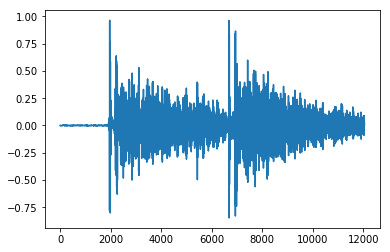

In [22]:
plt.plot(samples)

In [23]:
clip = AudioAugmentation()

In [24]:
data = clip.read_audio_file(file_path='../../../Source/Clean_train_clips/Shuffle/1/1.wav')

In [25]:
data.shape

(16000,)

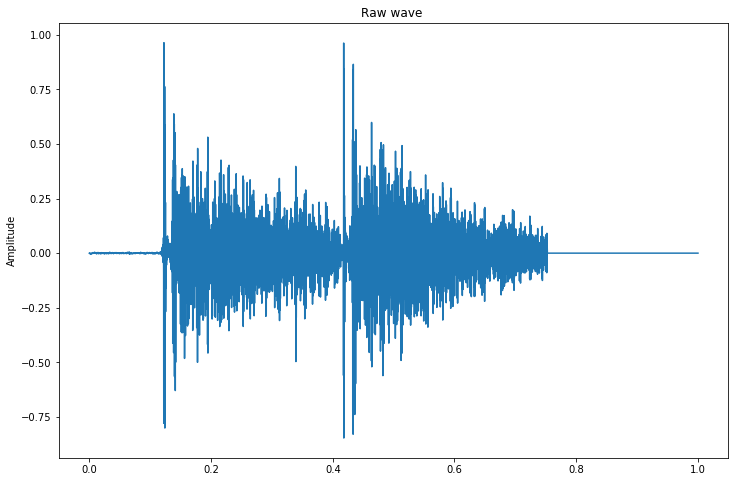

In [26]:
clip.plot_time_series(data)

In [27]:
noise = clip.add_noise(data=data)

In [28]:
noise.shape

(16000,)

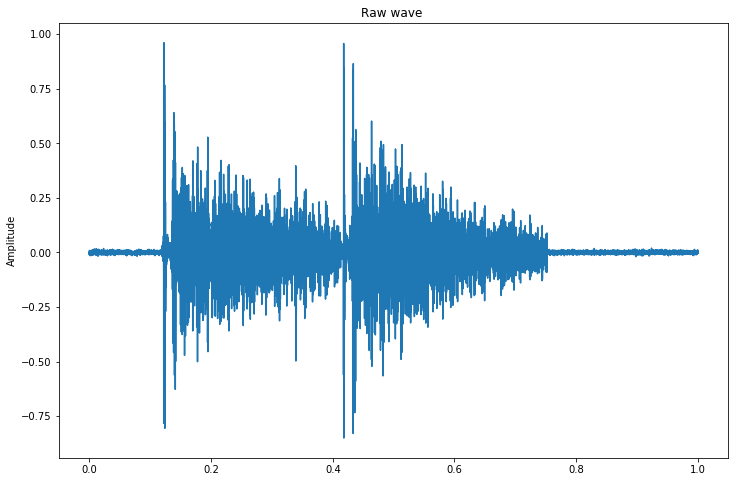

In [29]:
clip.plot_time_series(noise)